In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bankmarketing/bankmarketing.csv


**Let's assume this as coding practice**

In [2]:
marketing = pd.read_csv('/kaggle/input/bankmarketing/bankmarketing.csv')
marketing.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
marketing.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [5]:
marketing.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [6]:
index = marketing.columns
index

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [7]:
age = marketing['age'].unique()
sorted_age = np.sort(age)
sorted_age

array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 91, 92, 94, 95, 98])

In [8]:
marketing['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [9]:
marketing['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [10]:
marketing['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [11]:
marketing['default'].unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [12]:
marketing['housing'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [13]:
marketing['loan'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [14]:
marketing['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

In [15]:
marketing['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [16]:
marketing['day_of_week'].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [17]:
marketing['duration'].unique()

array([ 261,  149,  226, ..., 1246, 1556, 1868])

In [18]:
marketing['campaign'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 19, 18, 23, 14,
       22, 25, 16, 17, 15, 20, 56, 39, 35, 42, 28, 26, 27, 32, 21, 24, 29,
       31, 30, 41, 37, 40, 33, 34, 43])

In [19]:
marketing['pdays'].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20])

In [20]:
marketing['previous'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

In [21]:
marketing['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [22]:
marketing['emp.var.rate'].unique()

array([ 1.1,  1.4, -0.1, -0.2, -1.8, -2.9, -3.4, -3. , -1.7, -1.1])

In [23]:
marketing['cons.price.idx'].unique()

array([93.994, 94.465, 93.918, 93.444, 93.798, 93.2  , 92.756, 92.843,
       93.075, 92.893, 92.963, 92.469, 92.201, 92.379, 92.431, 92.649,
       92.713, 93.369, 93.749, 93.876, 94.055, 94.215, 94.027, 94.199,
       94.601, 94.767])

In [24]:
marketing['cons.conf.idx'].unique()

array([-36.4, -41.8, -42.7, -36.1, -40.4, -42. , -45.9, -50. , -47.1,
       -46.2, -40.8, -33.6, -31.4, -29.8, -26.9, -30.1, -33. , -34.8,
       -34.6, -40. , -39.8, -40.3, -38.3, -37.5, -49.5, -50.8])

In [25]:
marketing['euribor3m'].unique()

array([4.857, 4.856, 4.855, 4.859, 4.86 , 4.858, 4.864, 4.865, 4.866,
       4.967, 4.961, 4.959, 4.958, 4.96 , 4.962, 4.955, 4.947, 4.956,
       4.966, 4.963, 4.957, 4.968, 4.97 , 4.965, 4.964, 5.045, 5.   ,
       4.936, 4.921, 4.918, 4.912, 4.827, 4.794, 4.76 , 4.733, 4.7  ,
       4.663, 4.592, 4.474, 4.406, 4.343, 4.286, 4.245, 4.223, 4.191,
       4.153, 4.12 , 4.076, 4.021, 3.901, 3.879, 3.853, 3.816, 3.743,
       3.669, 3.563, 3.488, 3.428, 3.329, 3.282, 3.053, 1.811, 1.799,
       1.778, 1.757, 1.726, 1.703, 1.687, 1.663, 1.65 , 1.64 , 1.629,
       1.614, 1.602, 1.584, 1.574, 1.56 , 1.556, 1.548, 1.538, 1.531,
       1.52 , 1.51 , 1.498, 1.483, 1.479, 1.466, 1.453, 1.445, 1.435,
       1.423, 1.415, 1.41 , 1.405, 1.406, 1.4  , 1.392, 1.384, 1.372,
       1.365, 1.354, 1.344, 1.334, 1.327, 1.313, 1.299, 1.291, 1.281,
       1.266, 1.25 , 1.244, 1.259, 1.264, 1.27 , 1.262, 1.26 , 1.268,
       1.286, 1.252, 1.235, 1.224, 1.215, 1.206, 1.099, 1.085, 1.072,
       1.059, 1.048,

In [26]:
marketing['nr.employed'].unique()

array([5191. , 5228.1, 5195.8, 5176.3, 5099.1, 5076.2, 5017.5, 5023.5,
       5008.7, 4991.6, 4963.6])

In [27]:
marketing['y'].unique()

array(['no', 'yes'], dtype=object)

In [28]:
marketing.duplicated().sum()

12

# Univariate Analysis

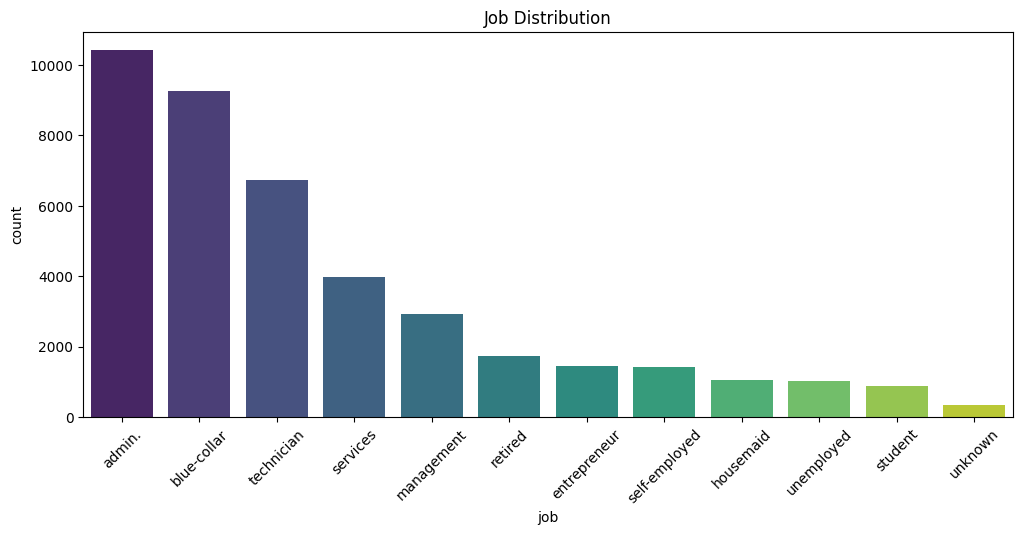

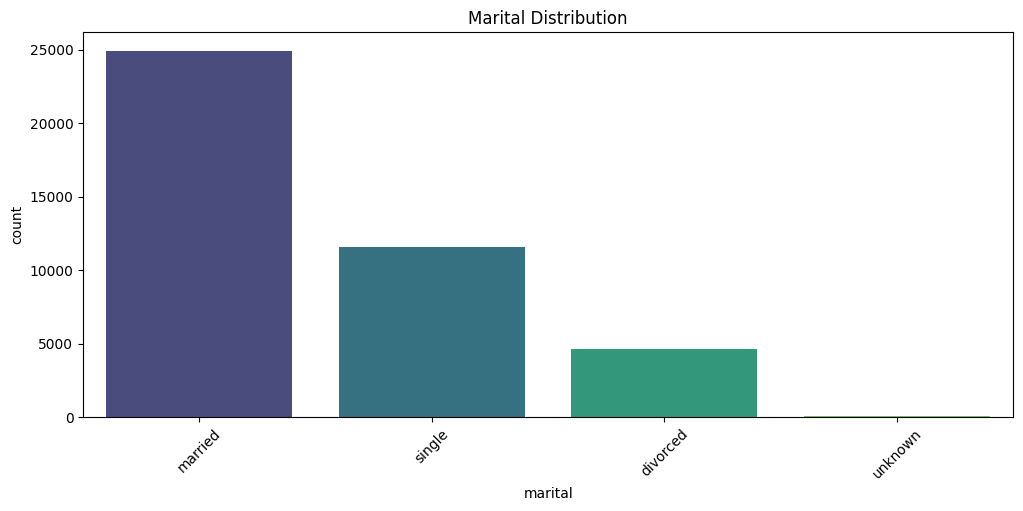

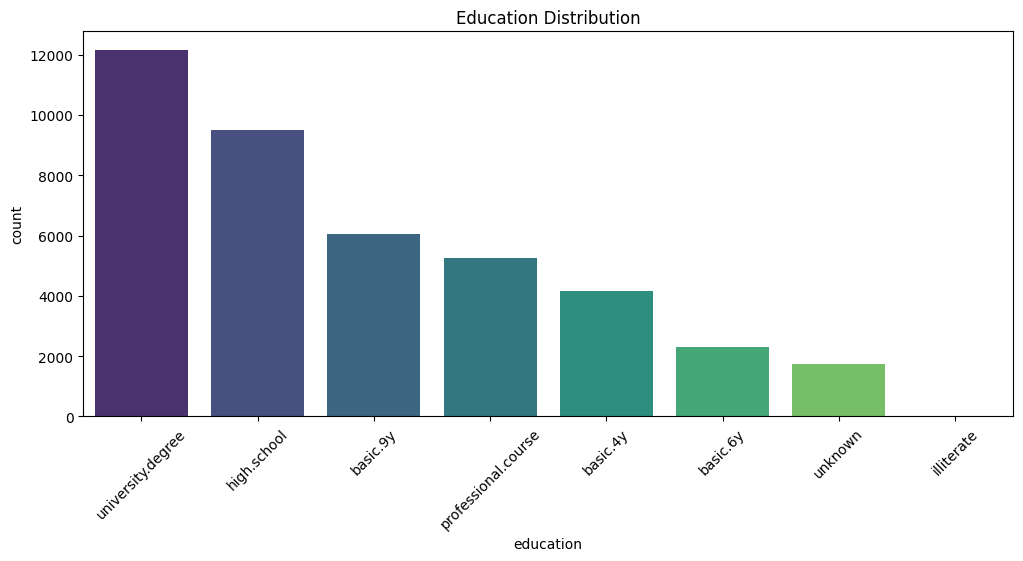

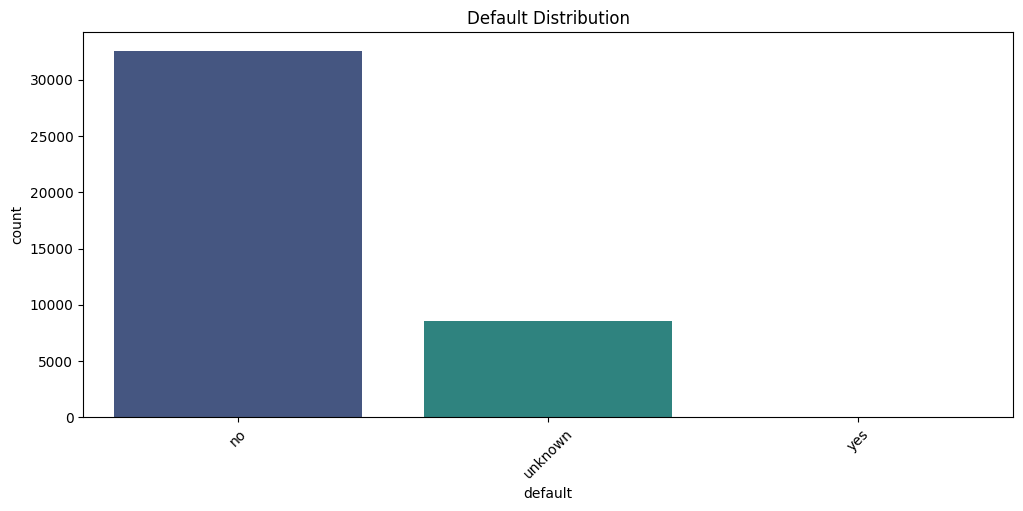

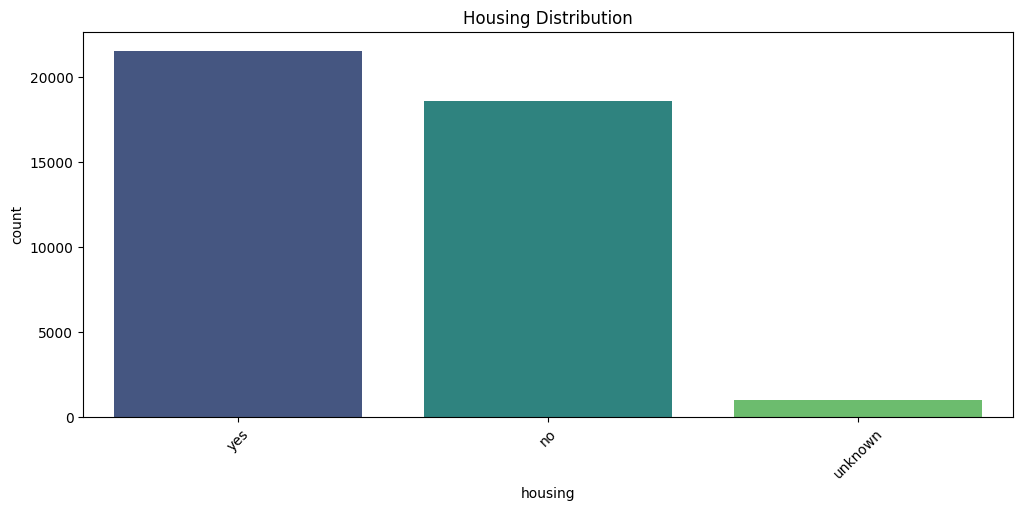

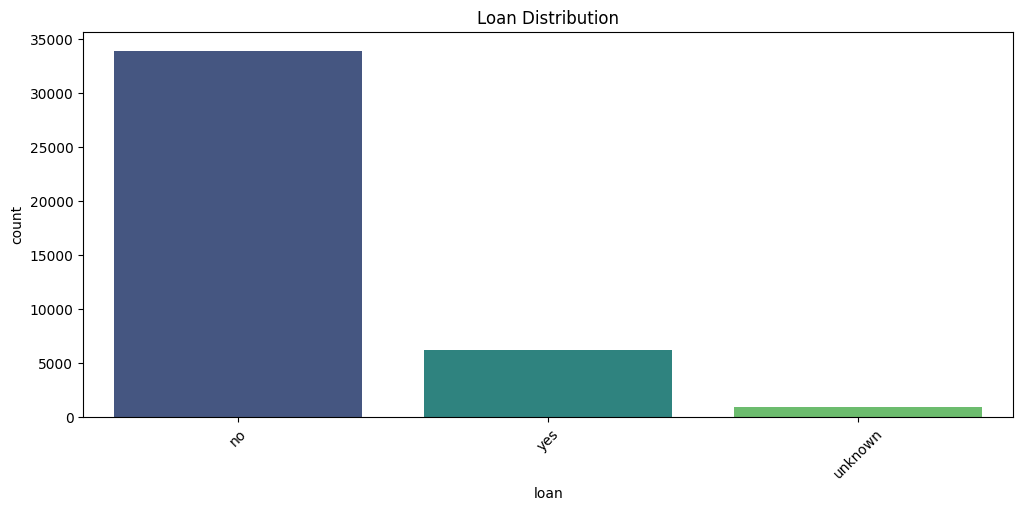

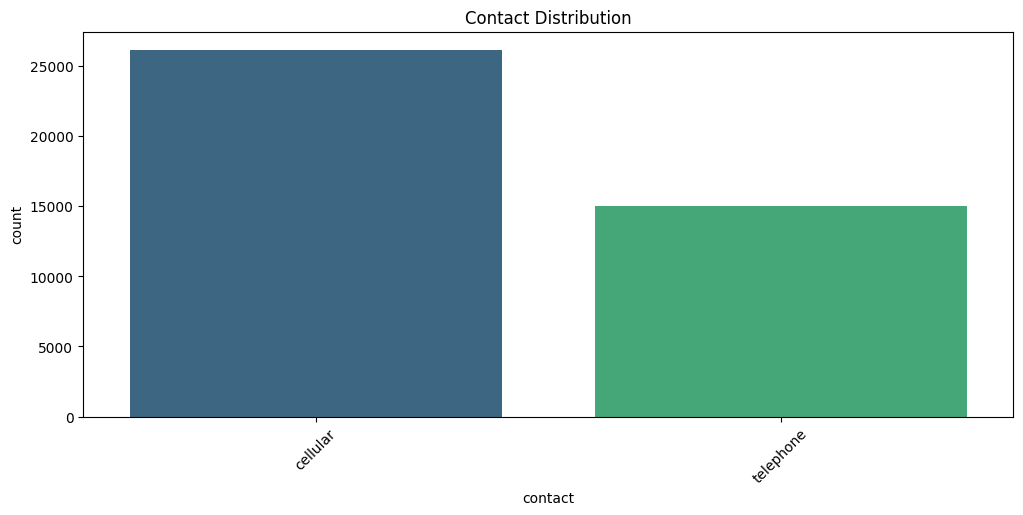

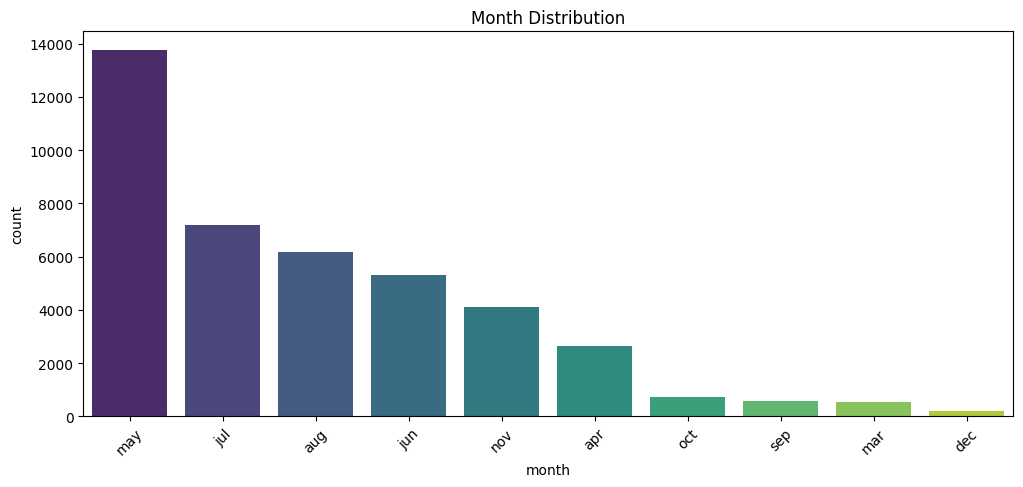

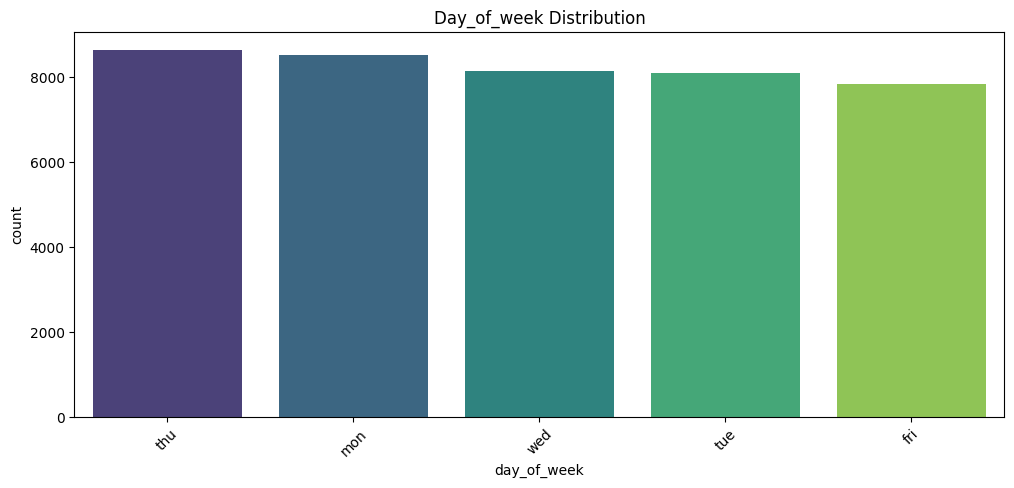

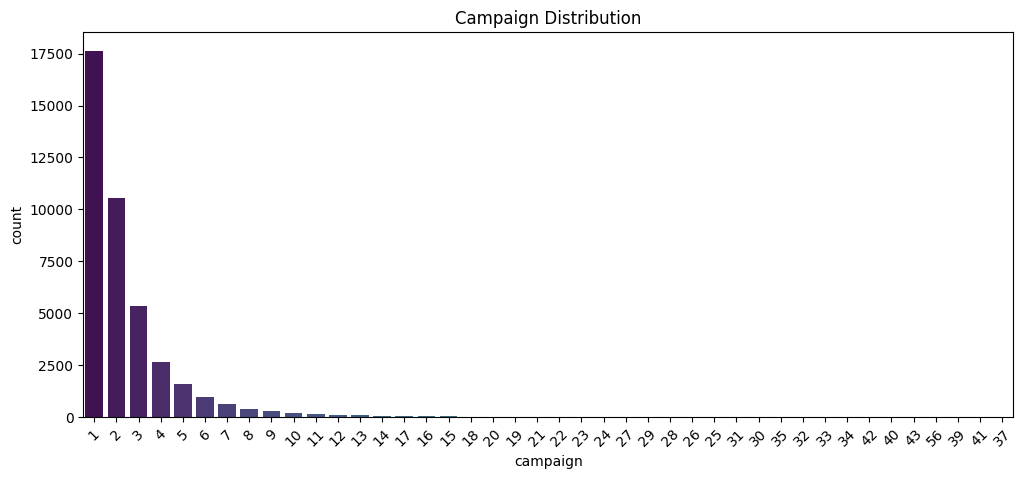

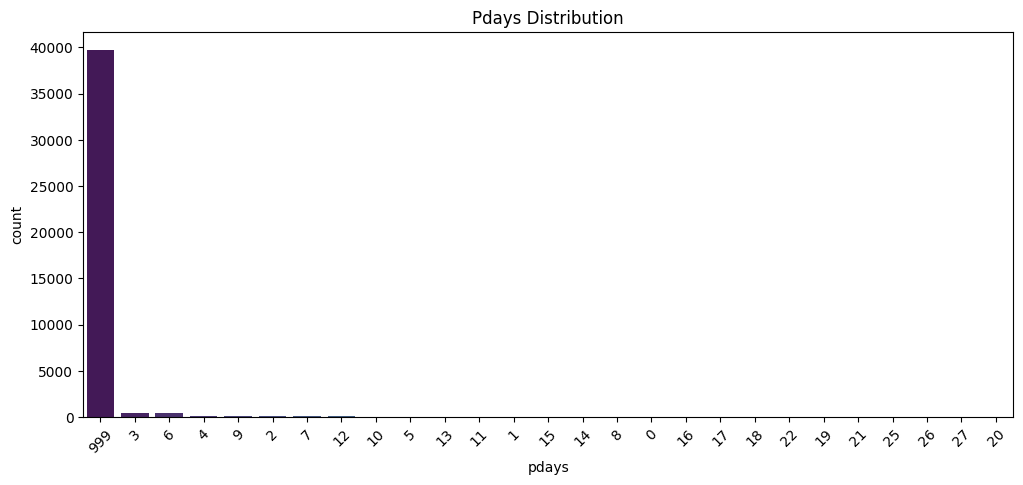

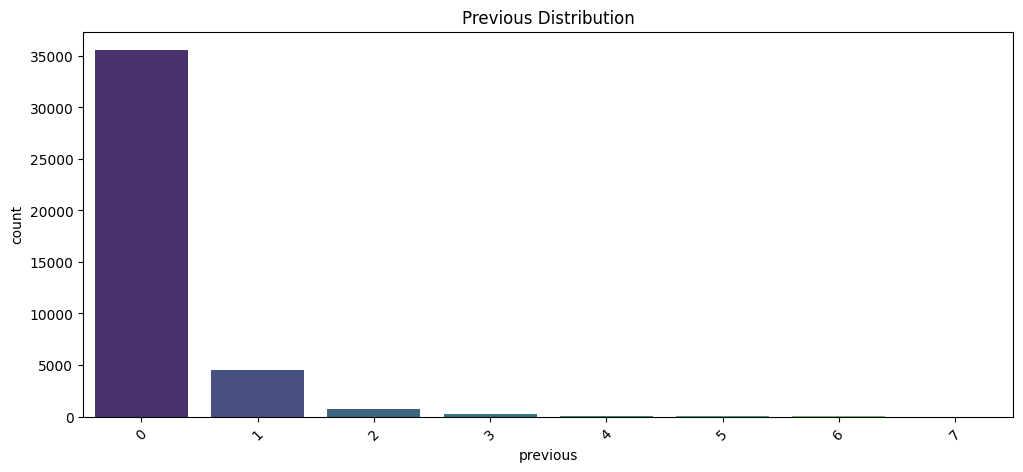

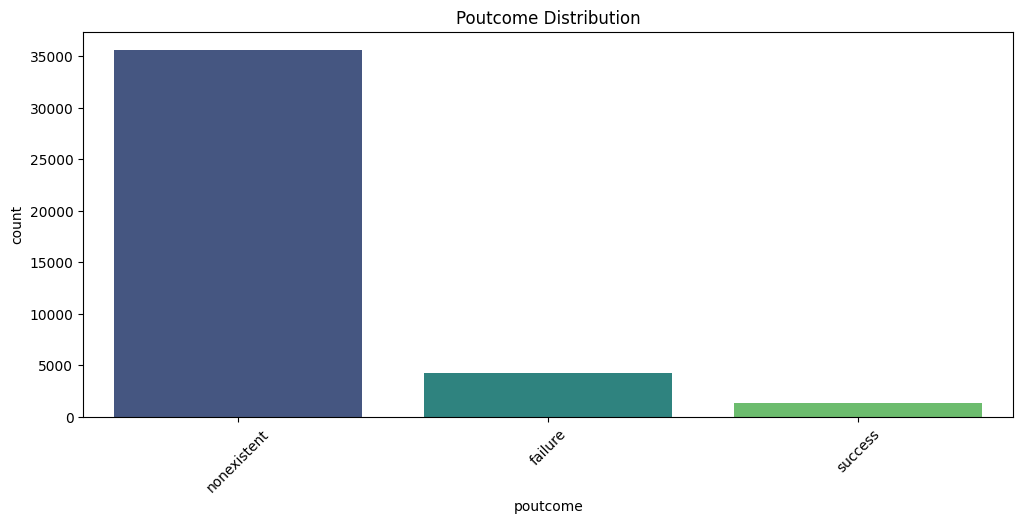

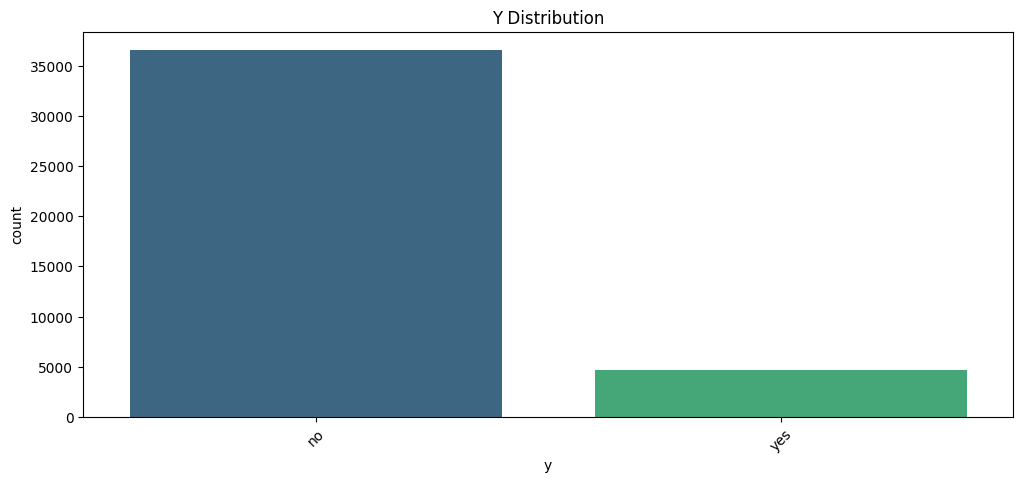

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt 

cat_cols = [
    'job', 
    'marital', 
    'education', 
    'default', 
    'housing', 
    'loan',
    'contact', 
    'month', 
    'day_of_week',  
    'campaign', 
    'pdays',
    'previous',
    'poutcome',
    'y'
]

for col in cat_cols:
    plt.figure(figsize=(12,5))
    order = marketing[col].value_counts().index
    sns.countplot(x=col, data=marketing, order = order, palette="viridis")
    plt.title(f"{col.capitalize()} Distribution") #capitalize the first word
    plt.xticks(rotation=45)
    plt.show()

In [30]:
marketing[['duration', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']].describe()

,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,258.285010,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,259.279249,1.570960,0.578840,4.628198,1.734447,72.251528
min,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,102.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,180.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,319.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,4918.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000
